In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.dates as mdates
from matplotlib.ticker import LinearLocator, FormatStrFormatter, FixedFormatter, MultipleLocator, AutoMinorLocator
import pandas as pd
import numpy as np
import datetime
#import xlsxwriter
from datetime import date

import time
import plotly.graph_objects as go

plt.style.use('ggplot')

In [2]:
""" Jupyter Browser Datendarstellung"""
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format= '{:,.3f}'.format

from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95% !important;}</style>"))

In [3]:
#File Import
Pfad = 'null Enterprise Analytics Prior 30 Days - Oct 23 2022.csv'

dat= pd.read_csv(Pfad,
                  header = 0, 
                  index_col=False,
                  sep = ',',
                  delimiter=None,
                  na_values=' ',
                  dayfirst = False,
                  parse_dates = [0],
                  skiprows = 0,
                  thousands = r',',
                  decimal = r'.',
                  encoding = 'utf-8')

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   27 non-null     datetime64[ns]
 1   Total Enabled Membership               27 non-null     int64         
 2   Enabled Full Members                   27 non-null     int64         
 3   Enabled Guests                         27 non-null     int64         
 4   Daily active members                   27 non-null     int64         
 5   Daily members posting messages         27 non-null     int64         
 6   Weekly active members                  27 non-null     int64         
 7   Weekly members posting messages        27 non-null     int64         
 8   Messages in public channels            27 non-null     int64         
 9   Messages in private channels           27 non-null     int64       

In [5]:
dat.columns

Index(['Date', 'Total Enabled Membership', 'Enabled Full Members',
       'Enabled Guests', 'Daily active members',
       'Daily members posting messages', 'Weekly active members',
       'Weekly members posting messages', 'Messages in public channels',
       'Messages in private channels', 'Messages in shared channels',
       'Messages in DMs', 'Percent of messages, public channels',
       'Percent of messages, private channels', 'Percent of messages, DMs',
       'Percent of views, public channels',
       'Percent of views, private channels', 'Percent of views, DMs',
       'Total Full Members', 'Total Guests', 'Total Claimed Full Members',
       'Total Claimed Guests', 'Total Members', 'Total Claimed Members',
       'Files uploaded', 'Messages posted by members', 'Name',
       'Public channels, single-workspace', 'Messages posted',
       'Messages posted by apps'],
      dtype='object')

In [6]:
dat.rename(columns={'Percent of messages, public channels':'%_Pb', 
                    'Percent of messages, private channels':'%_priv',
                    'Percent of messages, DMs':'%_dir',
                    'Percent of views, public channels':'%_view_pb',
                    'Percent of views, private channels':'%_view_priv',
                    'Messages posted':'msg_posted',
                    'Messages posted by apps':'msg_post_apps'
                   }, inplace=True)

In [7]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               27 non-null     datetime64[ns]
 1   Total Enabled Membership           27 non-null     int64         
 2   Enabled Full Members               27 non-null     int64         
 3   Enabled Guests                     27 non-null     int64         
 4   Daily active members               27 non-null     int64         
 5   Daily members posting messages     27 non-null     int64         
 6   Weekly active members              27 non-null     int64         
 7   Weekly members posting messages    27 non-null     int64         
 8   Messages in public channels        27 non-null     int64         
 9   Messages in private channels       27 non-null     int64         
 10  Messages in shared channels        27 no

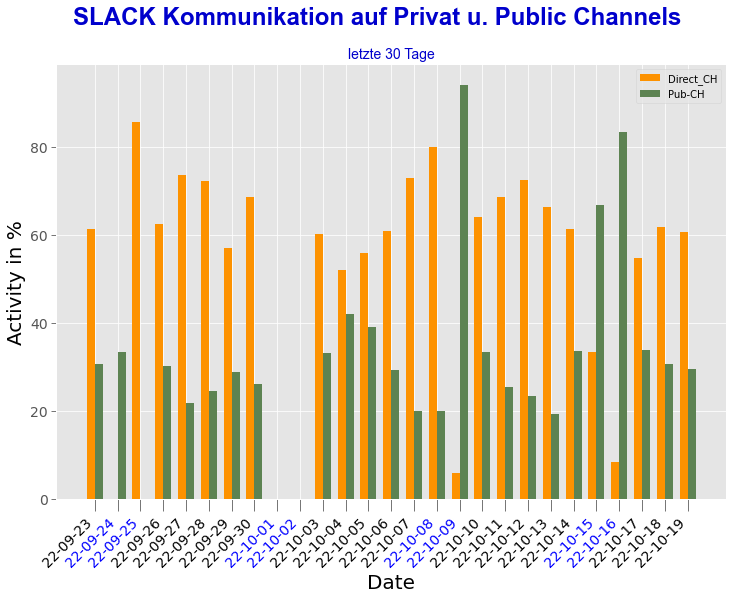

In [82]:
# Index liste mit Weekends
q = dat['Date'].dt.weekday >= 5


fig = plt.figure(figsize=(12,8))
ax = fig.clf
ax = fig.add_subplot(1,1,1)
ax.grid('visible')

labels = dat['Date'].astype('str')
x = np.arange(len(labels))
width = 0.35

pp0 = ax.bar(x - width/2, dat['%_dir']*100, width, color = '#FD9200', label='Direct_CH')
pp1 = ax.bar(x + width/2, dat['%_Pb']*100, width, color = '#5D8352', label='Pub-CH')

plt.suptitle('SLACK Kommunikation auf Privat u. Public Channels ', 
             c= '#0000CC', 
             fontsize=24, 
             fontweight = 'bold', 
             family = 'arial')
plt.title('letzte 30 Tage', 
             c= '#0000CC', 
             fontsize=14, 
             fontweight = 'normal', 
             family = 'arial')

ax.set_xticks(x, [x[2:] for x in labels], horizontalalignment = 'right')
ax.tick_params(axis='x', rotation=45, size=12, labelsize=14)

for i, label in enumerate(ax.get_xticklabels(which = 'major')):
    label.set(color='black', size = 14)
    if q[i] == True:
        label.set(color='blue', size = 14)

ax.tick_params(axis='y', rotation=0, size=5, labelsize=14)
ax.set_xlabel('Date', fontsize=20, c= [0.0,0.0,0.0])
ax.set_ylabel('Activity in %', fontsize=20, c= [0.0,0.0,0.0])

ax.legend(loc='upper right')
